# Exploring Dandiset 001359: 20250331_AIBS_Patchseq_human

**Version:** 0.250401.1603

**AI-Generated Notebook**  
:warning: **This notebook was automatically generated by AI and has not been fully reviewed or verified. Please use caution when interpreting any code or results.**

**Dandiset Link:**  
[https://dandiarchive.org/dandiset/001359/0.250401.1603](https://dandiarchive.org/dandiset/001359/0.250401.1603)

**Notebook Overview**
- Summary of the Dandiset and metadata
- How to access assets programmatically
- Exploration of one NWB file: metadata, structure, tree, and subject/protocol
- Examples of loading and visualizing electrophysiology data (voltage and current clamp)
- Suggestions for further exploration

**Caution**: The data is streamed over the network. For large datasets, this notebook demonstrates loading and plotting only a small subset for clarity and performance reasons.

## Dandiset Summary

- **Title:** 20250331_AIBS_Patchseq_human
- **Version:** 0.250401.1603
- **Identifier:** DANDI:001359
- **Description:** HMBA Lein PatchSeq upload (human) (Q1 2025)
- **Keywords:** Patch-seq, human, multimodal
- **Contributors:**  
  - Gonzalez, Limary  
  - Allen Institute for Brain Science  
  - National Institute of Mental Health  
  - Kalmbach, Brian  
  - Dalley, Rachel  
  - Lein, Ed  
  - Lee, Brian
- **Date Created:** 2025-03-12
- **License:** CC-BY-4.0  
- **Recommended Protocol:** [Patch-seq protocol (v3)](https://www.protocols.io/view/patch-seq-recording-and-extraction-8epv51n45l1b/v3)
- **Measurement Techniques:**  
  - voltage clamp technique  
  - current clamp technique  
  - analytical technique

**Citation:**  
Gonzalez, Limary; Allen Institute for Brain Science; National Institute of Mental Health; Kalmbach, Brian; Dalley, Rachel; Lein, Ed; Lee, Brian (2025) 20250331_AIBS_Patchseq_human (Version 0.250401.1603) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001359/0.250401.1603

## Required Packages

The following packages are needed to run this notebook.  
_Assume they are already installed:_

- numpy
- pandas
- matplotlib
- pynwb
- h5py
- remfile
- dandi (for DANDI API client)
- seaborn

## Explore the Dandiset with the DANDI API
Using the DANDI API, we connect to the archive and list the first few assets (files) found in this Dandiset.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001359", "0.250401.1603")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata.get('name')}")
print(f"Dandiset URL: {metadata.get('url', 'https://dandiarchive.org/dandiset/001359/0.250401.1603')}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: 20250331_AIBS_Patchseq_human
Dandiset URL: https://dandiarchive.org/dandiset/001359/0.250401.1603

First 5 assets:
- sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb (ID: 67dc935f-cbc1-4255-bfbf-b8a3b21dacf9)
- sub-1203384279/sub-1203384279_ses-1207304122_icephys.nwb (ID: 6ea1c410-f443-44ef-a471-41fdf7bc8760)
- sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb (ID: c269347a-2d4b-4b6a-8b7c-2ef303ff503d)
- sub-1203384279/sub-1203384279_ses-1207418023_icephys.nwb (ID: f9663375-c4d6-4a9a-941f-c93c8a7b333a)
- sub-1203384279/sub-1203384279_ses-1208065964_icephys.nwb (ID: e11626f5-2176-48fc-9c4e-26da02787ba3)


---
## Choosing an NWB File:  
For exploration, we use the following NWB file from the assets:

- **Path:** `sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb`
- **Asset ID:** `c269347a-2d4b-4b6a-8b7c-2ef303ff503d`
- **Direct Download URL:**  
  `https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/`

[View this NWB file on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/&dandisetId=001359&dandisetVersion=draft)

---
### Loading the NWB file
See below for an example of how to load this file _remotely_ (i.e., streaming over the network).
Note: Make sure to **not display the nwb object directly** to avoid excessive output.

In [2]:
import pynwb
import h5py
import remfile

nwb_url = "https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/"
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file, "r")
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()
# Do not display nwb directly.

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### NWB File Overview
We can extract high-level information from the file to get a sense of its contents and metadata.

In [3]:
print("Session description:", getattr(nwb, "session_description", None))
print("Identifier:", getattr(nwb, "identifier", None))
print("Session start time:", getattr(nwb, "session_start_time", None))
print("Institution:", getattr(nwb, "institution", None))
print("Subject ID:", getattr(nwb.subject, 'subject_id', None))
print("Species:", getattr(nwb.subject, 'species', None))
print("Sex:", getattr(nwb.subject, 'sex', None))
print("Age:", getattr(nwb.subject, 'age', None))
print("File create dates:", getattr(nwb, "file_create_date", None))
print("Sweep table description:", getattr(nwb.sweep_table, "description", None))
print("Acquisition keys:", list(nwb.acquisition.keys()))
print("Stimulus keys:", list(nwb.stimulus.keys()))
print("Processing modules:", list(nwb.processing.keys()))
print("Devices:", list(nwb.devices.keys()))
print("Epochs columns:", getattr(nwb.epochs, 'colnames', None))

Session description: PLACEHOLDER
Identifier: 0b7926a648abdf35aa91c67131cbd47b1d9786dd72001bd7e2b454be71ac3a6c
Session start time: 2022-09-06 17:44:39.146000+00:00
Institution: Allen Institute for Brain Science
Subject ID: 1203384279
Species: Homo sapiens
Sex: M
Age: P21170.0D
File create dates: [datetime.datetime(2022, 9, 6, 11, 40, 39, 406000, tzinfo=tzoffset(None, -25200)), datetime.datetime(2022, 9, 6, 11, 40, 39, tzinfo=tzoffset(None, -25200)), datetime.datetime(2022, 9, 6, 11, 40, 39, tzinfo=tzoffset(None, -25200)), datetime.datetime(2022, 9, 6, 11, 40, 49, tzinfo=tzoffset(None, -25200))]
Sweep table description: A sweep table groups different PatchClampSeries together.
Acquisition keys: ['data_00000_AD0', 'data_00001_AD0', 'data_00002_AD0', 'data_00003_AD0', 'data_00004_AD0', 'data_00005_AD0', 'data_00006_AD0', 'data_00007_AD0', 'data_00008_AD0', 'data_00009_AD0', 'data_00010_AD0', 'data_00011_AD0', 'data_00012_AD0', 'data_00013_AD0', 'data_00014_AD0', 'data_00015_AD0', 'data_000

### NWB File Hierarchy Summary

```text
NWBFile
├─ acquisition (voltage/current clamp recordings)
│   ├─ data_00000_AD0 (VoltageClampSeries)
│   ├─ data_00001_AD0 (VoltageClampSeries)
│   ├─ ...
│   └─ data_000XX_AD0 (CurrentClampSeries)
├─ stimulus (applied stimulus signals)
│   ├─ data_00000_DA0 (VoltageClampStimulusSeries)
│   ├─ data_00001_DA0 (VoltageClampStimulusSeries)
│   ├─ ...
│   └─ data_000XX_DA0 (CurrentClampStimulusSeries)
├─ processing
│   ├─ spikes (ProcessingModule)
│   │   └─ Sweep_N (TimeSeries: usually empty in this file)
├─ devices
│   └─ device_ITC18USB_Dev_0
├─ icephys_electrodes (LabelledDict)
├─ epochs & intervals (TimeIntervals)
├─ subject (Subject)
├─ sweep_table (SweepTable)
```

_Tip: You can convert intervals or sweep tables to pandas DataFrames for inspection (see code below)._

### Sweep Table: Structure Example
Let's view the first few rows of the sweep table, which groups PatchClampSeries (acquisition types) together in sweeps.

In [4]:
import pandas as pd

sweep_df = nwb.sweep_table.to_dataframe()
sweep_df_head = sweep_df.head()
display(sweep_df_head)

,series,sweep_number
id,,
0,[data_00000_AD0 pynwb.icephys.VoltageClampSeri...,0
1,[data_00000_DA0 pynwb.icephys.VoltageClampStim...,0
2,[data_00001_AD0 pynwb.icephys.VoltageClampSeri...,1
3,[data_00001_DA0 pynwb.icephys.VoltageClampStim...,1
4,[data_00002_AD0 pynwb.icephys.VoltageClampSeri...,2


## Example: Load and Plot a Subset of VoltageClampSeries Data

We'll illustrate how to load and plot part of the data from an acquisition time series.  
_Here, we select "data_00000_AD0" as an example (a VoltageClampSeries) and load the first 1000 samples for preview._

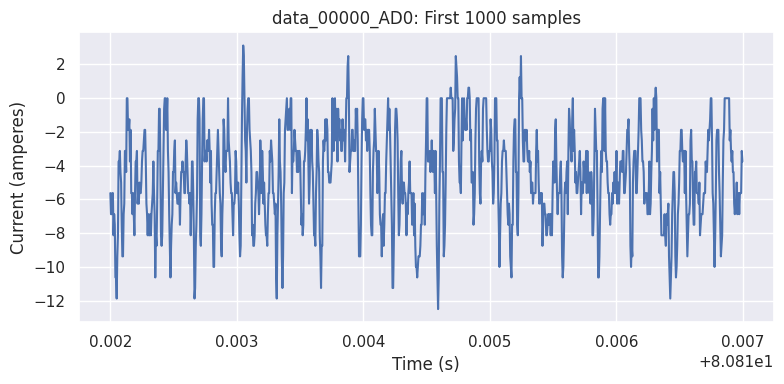

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
acq_key = "data_00000_AD0"
vclamp = nwb.acquisition[acq_key]
rate = vclamp.rate
start_time = vclamp.starting_time

# Load small subset
n = 1000  # number of samples to fetch for demonstration; adjust as needed
y = vclamp.data[:n]
t = np.arange(n) / rate + start_time

plt.figure(figsize=(8, 4))
plt.plot(t, y)
plt.xlabel("Time (s)")
plt.ylabel(f"Current ({vclamp.unit})")
plt.title(f"{acq_key}: First {n} samples")
plt.tight_layout()
plt.show()

## Example: Load and Plot a Subset of CurrentClampSeries Data

Let's repeat for a CurrentClampSeries found in the same file (here, "data_00004_AD0").

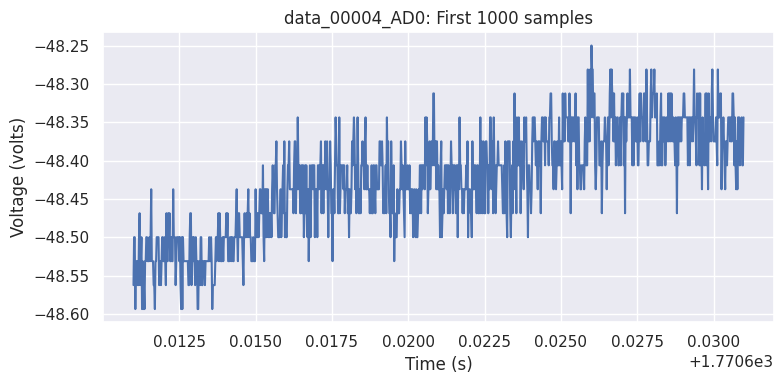

In [6]:
acq_key = "data_00004_AD0"
cclamp = nwb.acquisition[acq_key]
rate = cclamp.rate
start_time = cclamp.starting_time

n = 1000  # number of samples to preview
y = cclamp.data[:n]
t = np.arange(n) / rate + start_time

plt.figure(figsize=(8, 4))
plt.plot(t, y)
plt.xlabel("Time (s)")
plt.ylabel(f"Voltage ({cclamp.unit})")
plt.title(f"{acq_key}: First {n} samples")
plt.tight_layout()
plt.show()

## Viewing Associated Stimulus: Example
Let's load and visualize the stimulus waveform for the first acquisition ("data_00000_DA0") and compare to the acquisition trace.

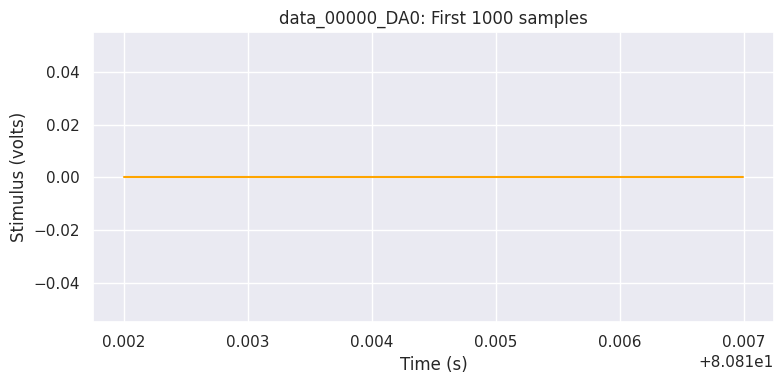

In [7]:
stim_key = "data_00000_DA0"
stim = nwb.stimulus[stim_key]
n = 1000
y_stim = stim.data[:n]
t_stim = np.arange(n) / stim.rate + stim.starting_time

plt.figure(figsize=(8, 4))
plt.plot(t_stim, y_stim, color='orange')
plt.xlabel("Time (s)")
plt.ylabel(f"Stimulus ({stim.unit})")
plt.title(f"{stim_key}: First {n} samples")
plt.tight_layout()
plt.show()

## Intervals (Epochs): Quick View
The NWB file includes intervals called epochs, representing experimental epochs. We load and display a table with their properties.

In [8]:
epochs_df = nwb.epochs.to_dataframe()
display(epochs_df.head())

,start_time,stop_time,tags,timeseries,treelevel
id,,,,,
1,80.812,80.857,"[Type=Inserted Testpulse, SubType=Baseline, Sh...","[(1, 9000, data_00000_DA0 pynwb.icephys.Voltag...",1.0
2,80.812,80.912,"[Type=Inserted Testpulse, ShortName=TP]","[(1, 20000, data_00000_DA0 pynwb.icephys.Volta...",0.0
3,80.857,80.867,"[Type=Inserted Testpulse, SubType=Pulse, Ampli...","[(9001, 2000, data_00000_DA0 pynwb.icephys.Vol...",1.0
4,80.867,80.912,"[Type=Inserted Testpulse, SubType=Baseline, Sh...","[(11001, 9000, data_00000_DA0 pynwb.icephys.Vo...",1.0
5,80.912,81.412,"[Name=Baseline Chunk, Index=0, ShortName=U_BLC0]","[(20001, 100000, data_00000_DA0 pynwb.icephys....",-1.0


## Device Information
The NWB file contains information about the hardware used for acquisition.

In [9]:
for device_name, device in nwb.devices.items():
    print(f"{device_name}: {device.description}")

device_ITC18USB_Dev_0: Harvard Bioscience (formerly HEKA/Instrutech) Model: ITC18USB


## Processing Module: Spikes

The `spikes` processing module appears to contain empty `TimeSeries` elements (Sweep_10, Sweep_12, etc.). You can check for available data as follows:

In [10]:
spikes_processing = nwb.processing.get("spikes", None)
if spikes_processing:
    print("Data interfaces in spikes module:", list(spikes_processing.data_interfaces.keys()))
    for name, ts in spikes_processing.data_interfaces.items():
        data_shape = ts.data.shape
        print(f"{name}: {data_shape}")
else:
    print("No spikes processing module found.")

Data interfaces in spikes module: ['Sweep_10', 'Sweep_12', 'Sweep_14', 'Sweep_15', 'Sweep_17', 'Sweep_18', 'Sweep_20', 'Sweep_21', 'Sweep_23', 'Sweep_26', 'Sweep_33', 'Sweep_34', 'Sweep_36', 'Sweep_37', 'Sweep_38', 'Sweep_39', 'Sweep_41', 'Sweep_42', 'Sweep_5', 'Sweep_62', 'Sweep_63', 'Sweep_64', 'Sweep_65', 'Sweep_67', 'Sweep_7', 'Sweep_9']
Sweep_10: (0,)
Sweep_12: (0,)
Sweep_14: (0,)
Sweep_15: (0,)
Sweep_17: (0,)
Sweep_18: (0,)
Sweep_20: (0,)
Sweep_21: (0,)
Sweep_23: (0,)
Sweep_26: (0,)
Sweep_33: (1,)
Sweep_34: (1,)
Sweep_36: (1,)
Sweep_37: (1,)
Sweep_38: (2,)
Sweep_39: (7,)
Sweep_41: (7,)
Sweep_42: (9,)
Sweep_5: (0,)
Sweep_62: (1,)
Sweep_63: (1,)
Sweep_64: (1,)
Sweep_65: (6,)
Sweep_67: (2,)
Sweep_7: (0,)
Sweep_9: (0,)


## Summary & Next Steps

This notebook demonstrated:
- How to use the DANDI API to access and list assets in a Dandiset
- How to stream an NWB file remotely and inspect its metadata and structure
- How to extract sweeps, acquisition series, and stimulus series
- Visualization of sample voltage and current clamp data, stimuli, and exploration of epochs/hardware metadata

**Future directions for analysis:**
- Examine all sweeps and patch clamp series in the file, or explore other NWB files within the Dandiset
- Relate metadata such as epochs and subject information to measurements
- Aggregate and visualize stimulus-response relationships across sweeps
- Explore multimodal data (e.g., combine with transcriptomics if available)

For more in-depth analysis, see the [Neurosift link for this NWB file](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/&dandisetId=001359&dandisetVersion=draft) to browse and visualize interactively.